**Project Overview**

*I will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public. We have to note that we already have labels for this but we will not use them for algorithm*

**The Data**

*We will use a data frame with 777 observations on the following 18 variables.*

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate*

**Importing Libraries**

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

**Reading the data and setting name of Universities as index**

In [110]:
df = pd.read_csv("College_Data")
df = df.set_index(['Unnamed: 0'])

**Exploratory Data Analysis**

**Scatterplot of F.Undergrad versus Outstate in private/public unis**

c:\users\szled\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


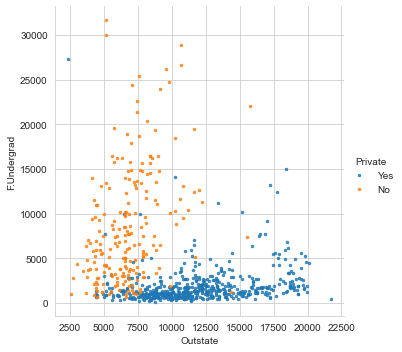

In [111]:
sns.lmplot(data=df,x='Outstate',y='F.Undergrad',hue='Private',scatter_kws={'s':6},fit_reg=False)

**Stacked histogram showing Out of State Tuition based on the Private column**

c:\users\szled\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


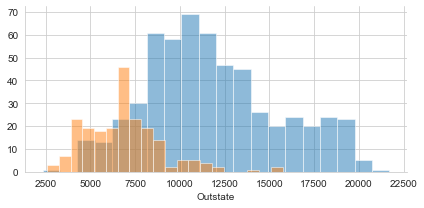

In [112]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df,hue='Private',aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.5)

**Similar histogram showing Grad.Rate based on the Private column**

c:\users\szled\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


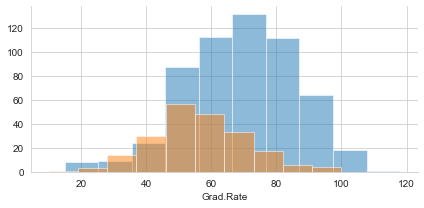

In [113]:
g = sns.FacetGrid(df,hue='Private',aspect=2)
g = g.map(plt.hist,'Grad.Rate',alpha=0.5)

*We can see Grad.Rate is above 100, we have to fix it by setting all exiding Grad.Rate to 100.*

In [114]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


*We see that only one University has Grad.Rate above 100*

In [115]:
df.loc['Cazenovia College','Grad.Rate'] = 100

**Creating K Means Cluster**

*Creating an instance of a K Means model with 2 clusters (We want to cluster private/public)*

In [116]:
kmeans = KMeans(n_clusters=2)

*Fitting model to data*

In [117]:
kmeans.fit(df.drop('Private',axis=1))

c:\users\szled\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

**Evaluation**

*Creating new column for df called 'Cluster', which is 1 for private and a 0 for public school*

In [118]:
def convert(c):
    if c == 'Yes':
        return 1
    else:
        return 0

In [119]:
df['Cluster'] = df['Private'].apply(convert)

*Creating confusion matrix and classification report to see how our model worked without any labels*

In [120]:
print(classification_report(df['Cluster'],kmeans.labels_))
print(confusion_matrix(df['Cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

[[ 74 138]
 [ 34 531]]


*It's not bad taking account the algorithm is only using features to cluster the data to 2 groups.*